In [2]:
import numpy as np
from skimage import data, img_as_float, img_as_ubyte, exposure, io, color
from skimage.io import imread
from skimage.exposure import cumulative_distribution
from skimage.restoration import denoise_bilateral, denoise_nl_means,estimate_sigma
from skimage.util import random_noise
from skimage.color import rgb2gray
from PIL import Image, ImageEnhance, ImageFilter
from scipy import ndimage, misc
import matplotlib.pyplot as plt
import numpy.fft as fp

In [3]:
def signaltonoise(a, axis=0, ddof=0):
    a = np.asanyarray(a)
    m = a.mean(axis)
    sd = a.std(axis=axis, ddof=ddof)
    return np.where(sd == 0, 0, m/sd)

In [4]:
image = Image.open('domba.jpg')
image_rgb2gray = image.convert('L')
image_nparray_gray = np.array(image_rgb2gray)
image_nparray_color = np.array(image)

In [5]:
# Histogram gambar
im_r, im_g, im_b = image.split()

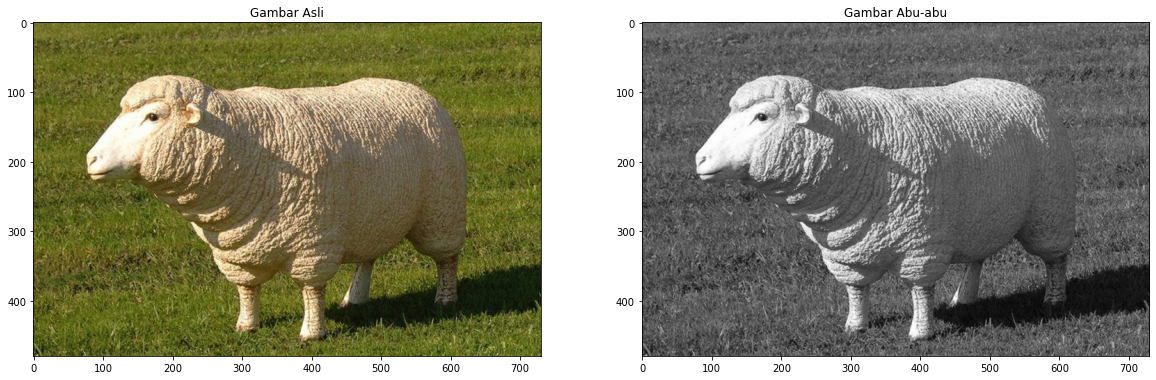

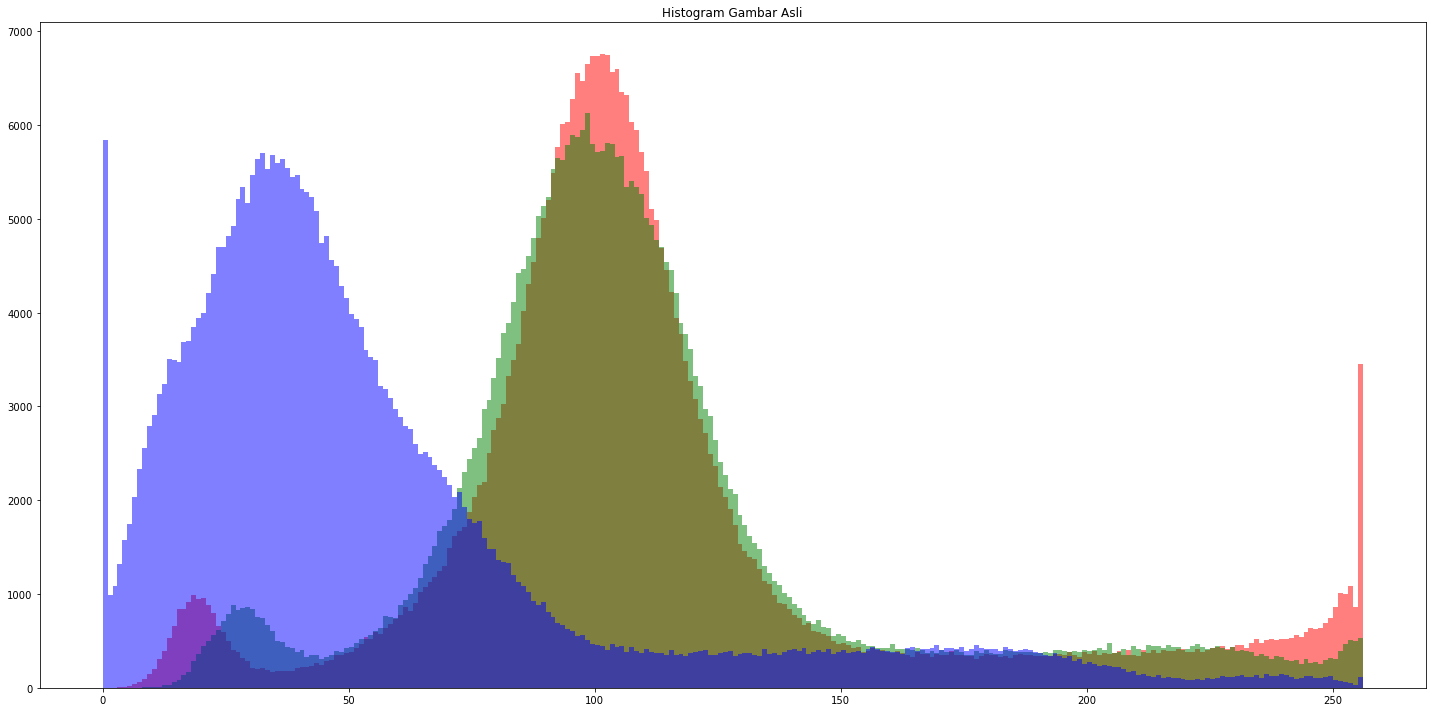

In [156]:
plt.figure(figsize=(20,30))
plt.subplot(221)
plt.imshow(image_nparray_color, cmap=plt.cm.gray)
plt.title('Gambar Asli')

plt.subplot(222)
plt.imshow(image_nparray_gray, cmap=plt.cm.gray)
plt.title('Gambar Abu-abu')

plt.figure(figsize=(20,10))
plt.hist(np.array(im_r).ravel(), bins=256, range=(0,256), color='r', alpha=0.5)
plt.hist(np.array(im_g).ravel(), bins=256, range=(0,256), color='g', alpha=0.5)
plt.hist(np.array(im_b).ravel(), bins=256, range=(0,256), color='b', alpha=0.5)
plt.title('Histogram Gambar Asli')
plt.tight_layout()

In [157]:
#fft spectrum magnitude
fft_freq = fp.fft2(image_nparray_gray)
im_fft_freq = fp.fftshift(fft_freq)
log_freq = np.log(np.abs(im_fft_freq))

#FFT Phase
phase_fft = np.angle(im_fft_freq)

#Reconstructed
image_recon = fp.ifft2(fft_freq).real
recon = np.clip(image_recon,0,255)

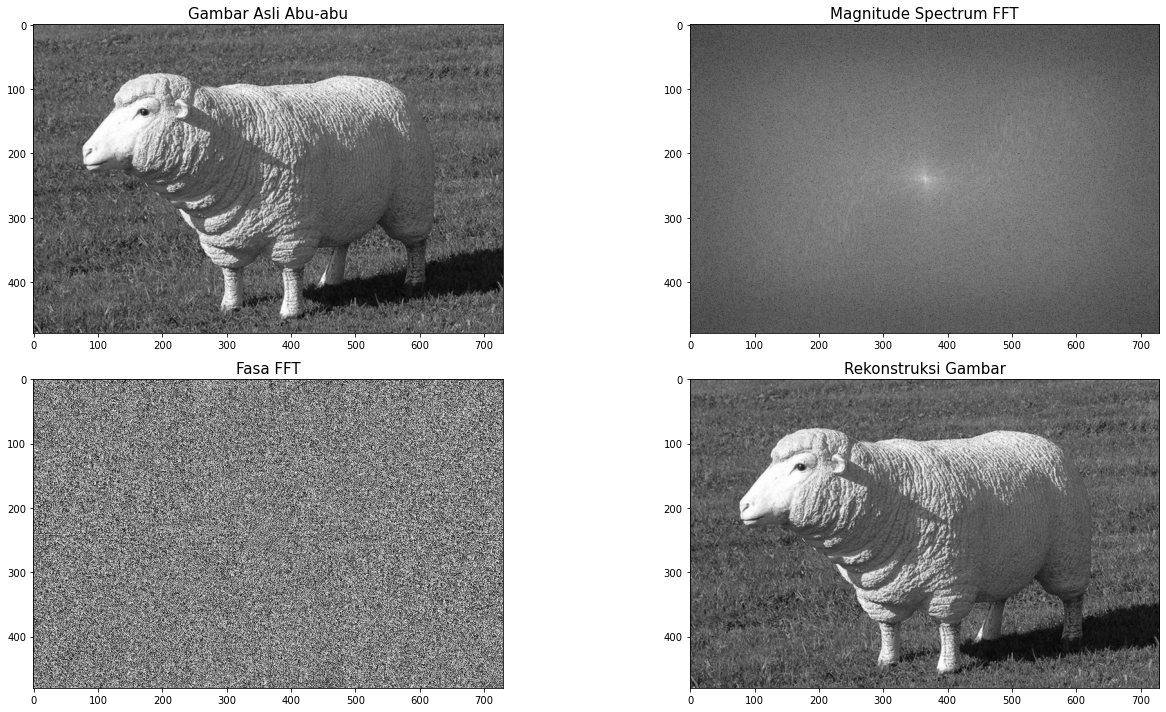

In [158]:
plt.figure(figsize=(20,10))
plt.subplot(221)
plt.imshow(image_nparray_gray, cmap=plt.cm.gray)
plt.title('Gambar Asli Abu-abu', size = 15)

plt.subplot(222)
plt.imshow(log_freq, cmap=plt.cm.gray)
plt.title('Magnitude Spectrum FFT', size = 15)

plt.subplot(223)
plt.imshow(phase_fft, cmap=plt.cm.gray)
plt.title('Fasa FFT', size = 15)


plt.subplot(224)
plt.imshow(recon, cmap=plt.cm.gray)
plt.title('Rekonstruksi Gambar', size = 15)


plt.tight_layout(w_pad=0.0005)
plt.show()

In [221]:
def tresshold_lebih_kecil(fft_freq,tress):
    array = fft_freq.copy()
    for y in range(len(array)):
        for x in range(len(array[y])):
            if array[y][x] < tress:
                array[y][x] = 0
    return array

def tresshold_lebih_besar(fft_freq,tress):
    array = fft_freq.copy()
    for y in range(len(array)):
        for x in range(len(array[y])):
            if array[y][x] > tress:
                array[y][x] = 1
    return array

def plot_tress_kecil(fft_freq,tress):
    plt.figure(figsize=(30,10))
    kon_tress = 1
    for i in range(1,11):
        fft_tress_copy = fft_freq.copy()
        fft_tress = tresshold_lebih_kecil(fft_tress_copy,tress)
        
        image_recon = fp.ifft2(fft_tress).real
        recon = np.clip(image_recon,0,255)
        
        plt.subplot(2,5,i)
        plt.imshow(recon, cmap=plt.cm.gray)
        plt.title('Tressholding '+str(round(tress)), size = 15)
        
        kon_tress += 1/2
        tress *= kon_tress
    return

def plot_tress_besar(fft_freq,tress):
    plt.figure(figsize=(30,10))
    kon_tress = 1
    for i in range(1,11):
        fft_tress_copy = fft_freq.copy()
        fft_tress = tresshold_lebih_besar(fft_tress_copy,tress)
        
        image_recon = fp.ifft2(fft_tress).real
        recon = np.clip(image_recon,0,255)
        
        plt.subplot(2,5,i)
        plt.imshow(recon, cmap=plt.cm.gray)
        plt.title('Tressholding '+str(round(tress)), size = 15)
        
        kon_tress += 1/2
        tress *= kon_tress
    return

### Tressholding untuk nilai fft lebih kecil dari x

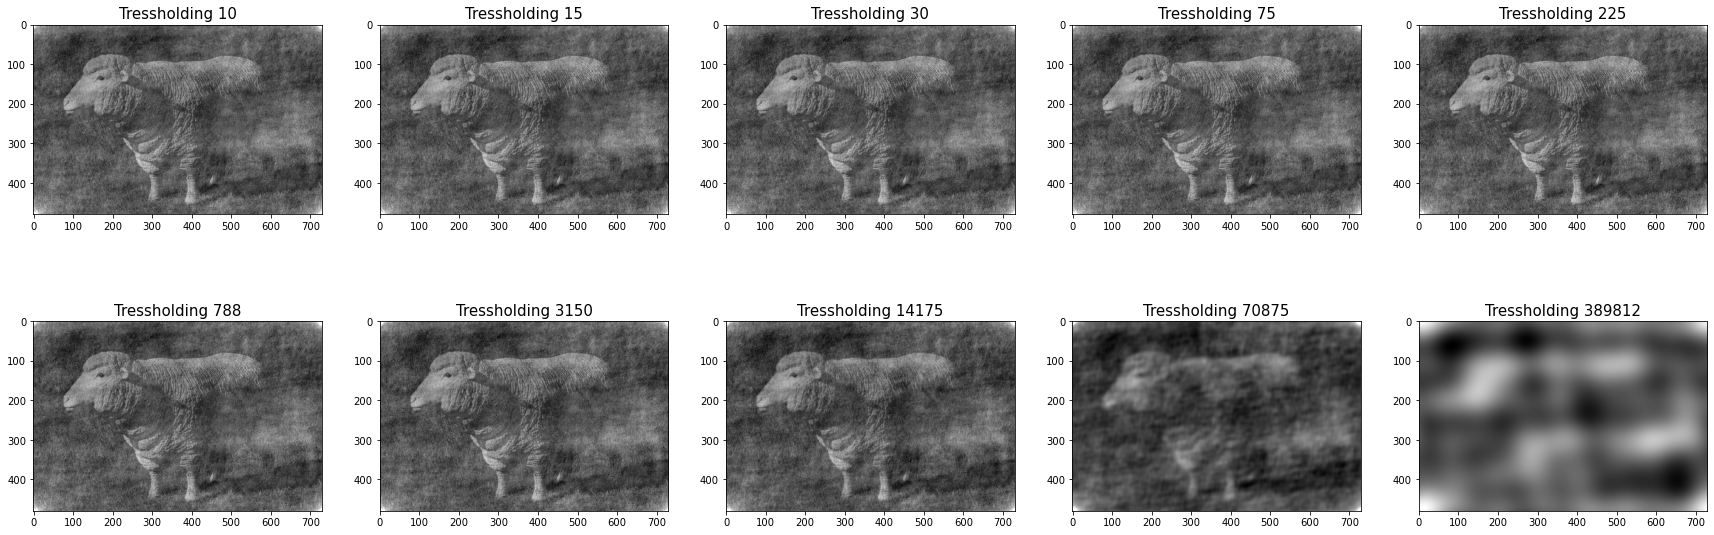

In [222]:
plot_tress_kecil(fft_freq,10)

### Tressholding untuk nilai fft lebih besar dari x

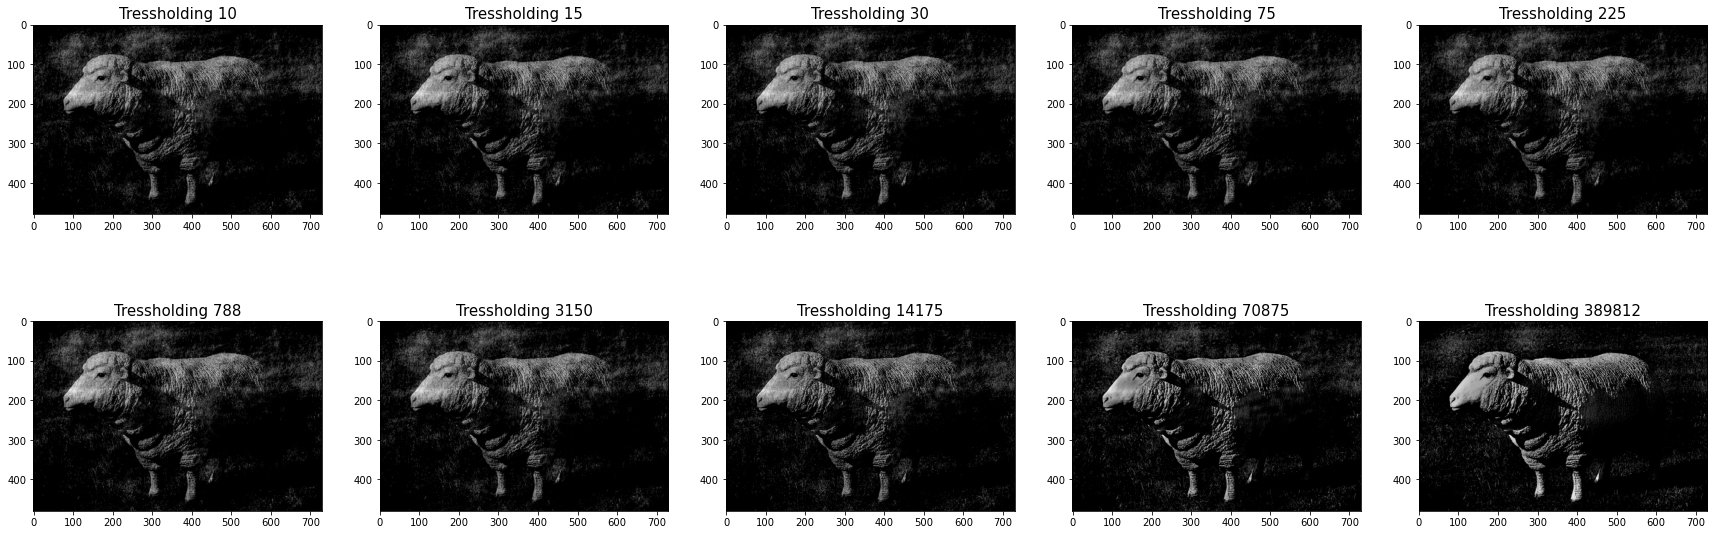

In [223]:
plot_tress_besar(fft_freq,10)